In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.options.display.max_columns=100

In [2]:
df=pd.read_csv(r"C:\Users\berid\python\csv_files\bank churn\churn_prediction.csv")

In [3]:
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT


In [4]:
df.isna().mean()[df.isna().mean()>0]*100

# nan values percentage

gender        1.849764
dependents    8.678035
occupation    0.281869
city          2.829258
dtype: float64

In [5]:
df.nunique()

customer_id                       28382
vintage                            1459
age                                  90
gender                                2
dependents                           15
occupation                            5
city                               1604
customer_nw_category                  3
branch_code                        3185
current_balance                   27903
previous_month_end_balance        27922
average_monthly_balance_prevQ     27801
average_monthly_balance_prevQ2    27940
current_month_credit              10411
previous_month_credit             10711
current_month_debit               13704
previous_month_debit              14010
current_month_balance             27944
previous_month_balance            27913
churn                                 2
last_transaction                    361
dtype: int64

In [6]:
df=df.drop(columns='customer_id')

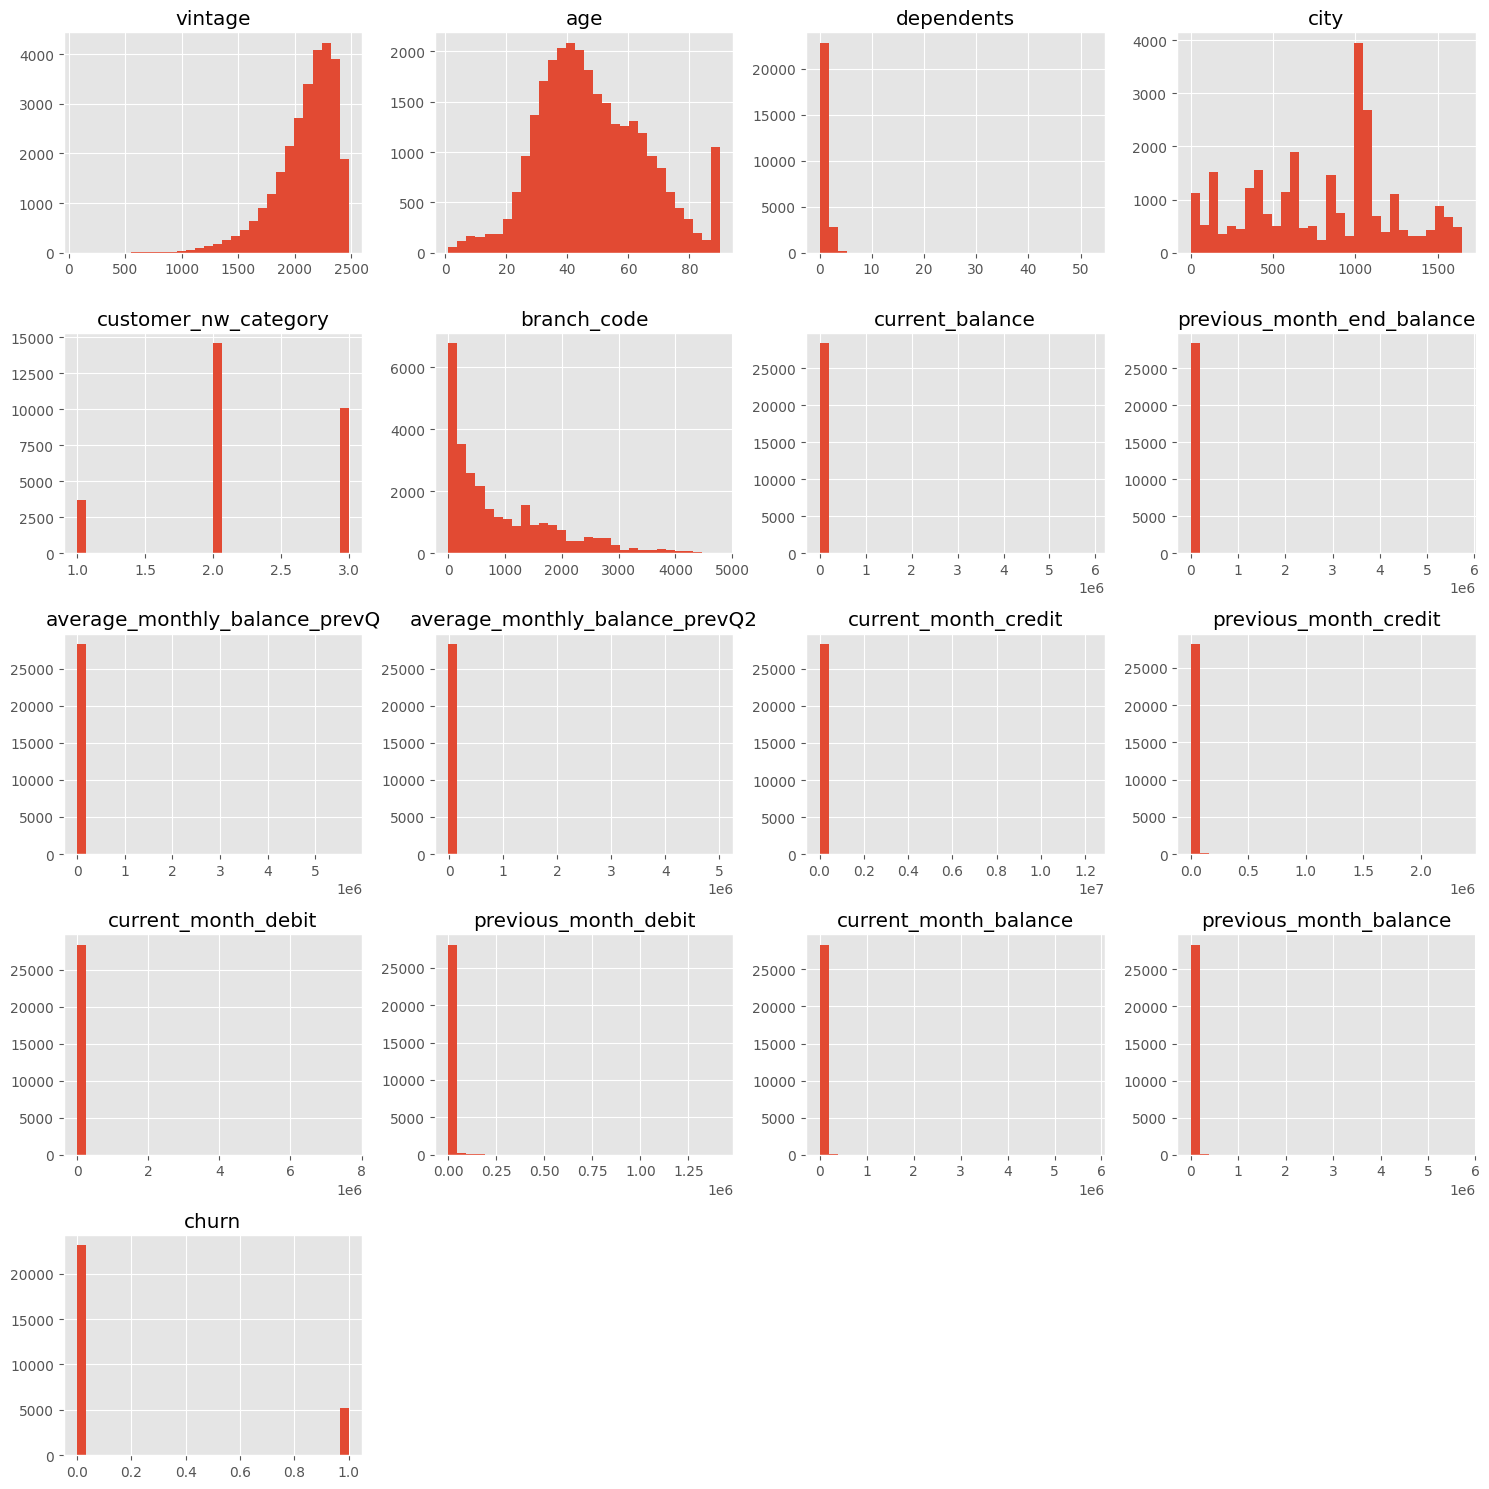

In [7]:
df.hist(bins=30,figsize=(15,15))
plt.tight_layout()
plt.show()

In [8]:
from scipy.stats import chi2_contingency

def determine_significance(col):
    contingency_table = pd.crosstab(df[col], df['churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    if p < 0.05:
        return True
    else:
        return False

significant_cols = []
insignificant_cols = []

for col in ['gender', 'occupation', 'customer_nw_category', 'city']:
    if determine_significance(col):
        significant_cols.append(col)
    else:
        insignificant_cols.append(col)

significant_cols, insignificant_cols


# all categorical columns are statistically significant

(['gender', 'occupation', 'customer_nw_category', 'city'], [])

In [9]:
df

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT


In [11]:
df=df.drop(columns=['city','branch_code'])

In [12]:
df['last_transaction']=pd.to_datetime(df['last_transaction'],errors='coerce').apply(lambda x: x.toordinal() if not pd.isna(x) else None)

In [13]:
for col in df.select_dtypes([object]):
    dummies=pd.get_dummies(df[col],prefix=col,dummy_na=True).astype(int)
    df=df.drop(columns=col)
    df=pd.concat([df,dummies],axis=1)

In [14]:
X=df.drop(columns='churn')
y=df['churn']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [15]:
from xgboost import XGBClassifier

In [16]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model):
    train_sizes,train_scores,test_scores=learning_curve(
        X=X_train,
        y=y_train,
        estimator=model,
        train_sizes=np.linspace(0.1,1,10),
        cv=3,
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )
    
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='red')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='red')
    plt.xlabel('Training Set Size')
    plt.ylabel('MAE')
    plt.title('Learning Curve for XGBoost Classifier')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

[learning_curve] Training set sizes: [ 1513  3027  4540  6054  7568  9081 10595 12108 13622 15136]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.9s finished


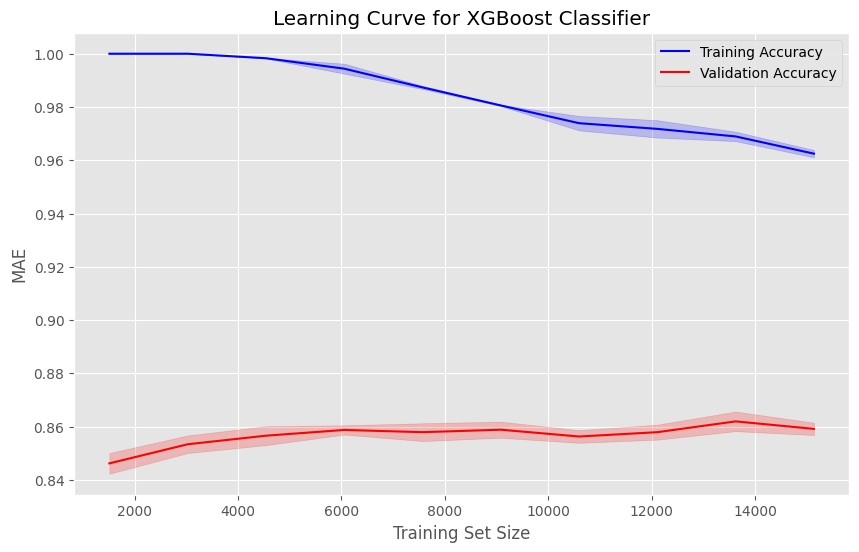

In [17]:
plot_learning_curve(XGBClassifier())

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.utils import parallel_backend

param_grid={'n_estimators':[200,500,1000],
            'max_depth':[3,5,7],
            'learning_rate':[0.01,0.02,0.1]}

grid_search_cv=GridSearchCV(estimator=XGBClassifier(),
                            param_grid=param_grid,
                            scoring='accuracy',
                            cv=3,
                            #verbose=10,
                            n_jobs=-1
                            )

grid_search_cv.fit(X_train, y_train)

best_model=grid_search_cv.best_estimator_
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
0.8680469141264706


[learning_curve] Training set sizes: [ 1513  3027  4540  6054  7568  9081 10595 12108 13622 15136]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.9s finished


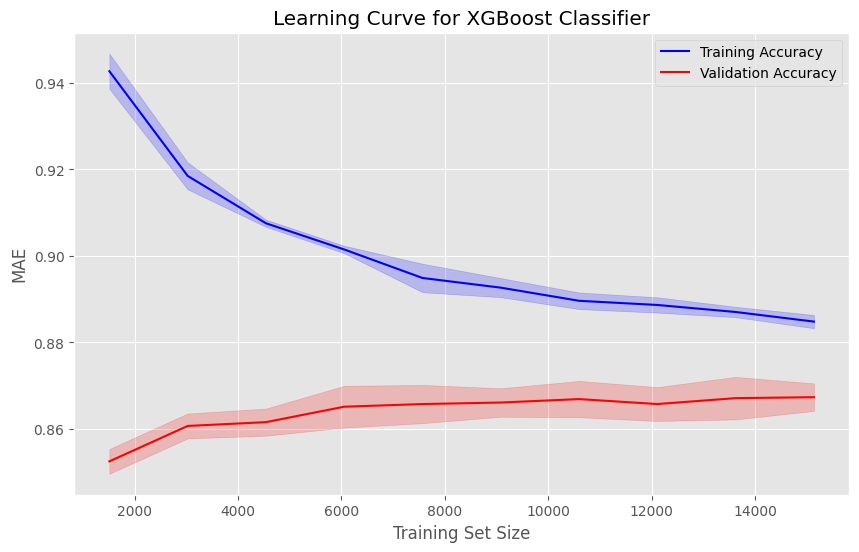

In [19]:
plot_learning_curve(best_model)

In [20]:
train_prediction=best_model.predict(X_train)
test_prediction=best_model.predict(X_test)

from sklearn import metrics
accuracy_train=metrics.accuracy_score(train_prediction,y_train)
accuracy_test=metrics.accuracy_score(test_prediction,y_test)

print('Train and Test Accuracies: ',accuracy_train,accuracy_test)

Train and Test Accuracies:  0.8816560229024444 0.8589043508895543


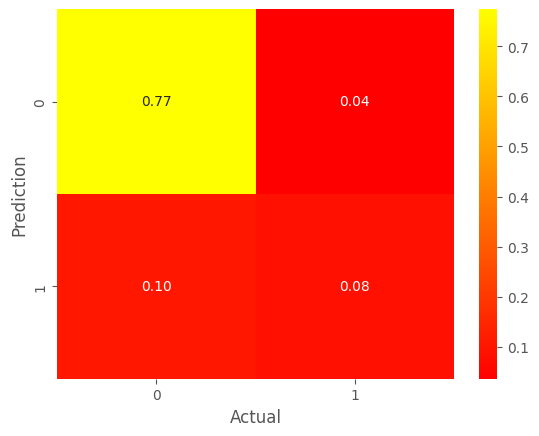

In [21]:
cm=metrics.confusion_matrix(y_test,test_prediction)
cm_percentage=cm/cm.sum()

sns.heatmap(cm_percentage,annot=True,fmt='.2f',cmap='autumn')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

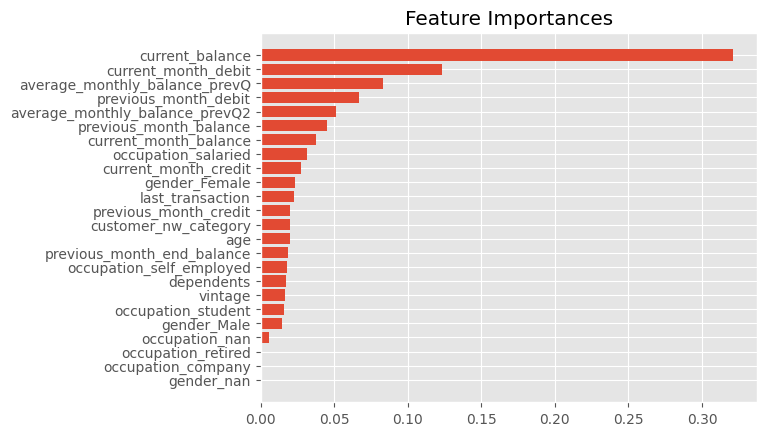

In [22]:
importances=best_model.feature_importances_
features=best_model.feature_names_in_

importances_dict={k:v for k,v in zip(features,importances)}
importances_dict = dict(sorted(importances_dict.items(), key=lambda item: item[1],reverse=False))

plt.barh(y=[k for k,v in importances_dict.items()],
         width=[v for k,v in importances_dict.items()])
plt.title('Feature Importances')
plt.show()